In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

In [29]:
df = pd.read_csv("./Data Files/Admission_Predict.csv")

In [30]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [31]:
df.shape

(400, 9)

In [32]:
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold=0.75)
df["Chance of Admit "] = bi.fit_transform(df[['Chance of Admit ']])

In [33]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [34]:
x = df.drop('Chance of Admit ', axis = 1)

In [35]:
y = df["Chance of Admit "]

In [36]:
y = y.astype("int")
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int32

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0, test_size=0.25)

In [41]:
x_test.shape

(100, 8)

In [42]:
x_test.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,133,309,105,5,3.5,3.5,8.56,0
309,310,308,110,4,3.5,3.0,8.60,0
341,342,326,110,3,3.5,3.5,8.76,1
196,197,306,105,2,3.0,2.5,8.26,0
246,247,316,105,3,3.0,3.5,8.73,0


In [43]:
y_train.head()

250    0
63     0
312    1
159    0
283    1
Name: Chance of Admit , dtype: int32

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
cs = DecisionTreeClassifier(random_state=0)

In [46]:
cs.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [47]:
x_train.head()
y_p = cs.predict(x_test)

In [48]:
result = pd.DataFrame({
    'actual': y_test,
    'pred': y_p
})

In [ ]:
result

,actual,pred
132,0,0
309,0,0
341,1,1
196,0,0
246,0,1
...,...,...
146,0,0
135,1,1
390,0,0
264,0,0


In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

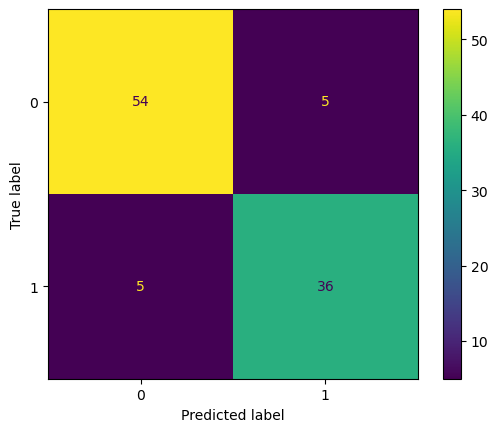

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, y_p)

In [51]:
accuracy_score(y_test, y_p)

0.9

In [52]:
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [53]:
from sklearn.tree import plot_tree

In [54]:
import matplotlib.pyplot as plt

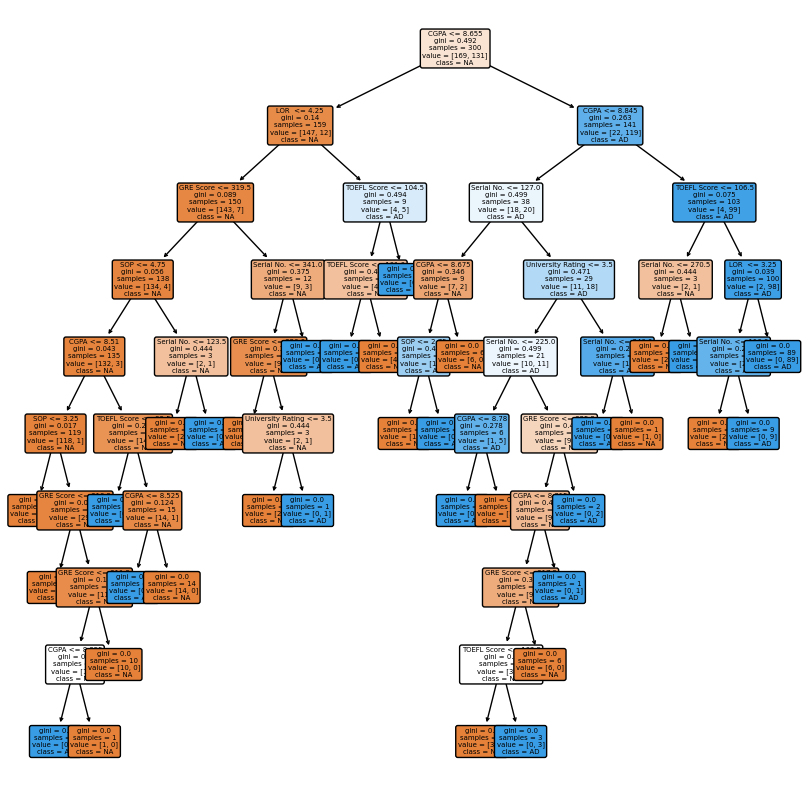

In [55]:
plt.figure(figsize=(10,10))
plot_tree(cs, fontsize=5, filled=True, rounded=True, feature_names=x.columns, class_names=["NA", "AD"]);